In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("marketing_campaign.xlsx")

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


Veri Setimizin hikayesi: Verilen cevapları arttıracak veya maliyeti düşürecek modeli kurmamız için bir şirket tarafından sağlanan verilerimiz var. AcceptedCmpler kampyanyalarımız. Müşterilerimiz eğer kabul ettilerse 1 etmedilerse 0 değerleri atanıyor. Müşterilerimizin evlilik durumuna, eğitim durumuna, doğum tarihlerine, gelirlerine, kaçtane çocukları olduğuna,kaçtane genç yaşta çocukları olduğuna, ne zaman şirkete kayıt olduklarına, son 2 yılda çeşitli ürünlere harcadıkları miktarlara, ve şirketle iletişimlerine (katalogla yaptıkları aleşverişler, indirimle yaptıkları alışverişler, web sitesine uğramaları v.b.) dair verilerimiz var. 29 Sütun 2240 satırdan oluşmakta. Buyrun birazda derinlemesine inelim.


In [4]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

In [5]:
#Görüldüğü üzere gelir kısmında eksik veri gözlemleniyor buyrun bir keşfedelim.
data[data.isnull().any(axis = 1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,1,7,6,0,0,0,0,0,0,0


In [6]:
data["Income"] = data["Income"].fillna(data["Income"].mean())

Yukarıda çalıştırdığımız fonksiyon ile null verileri ortalama ile doldurduk. Normalda sağlıklı bir teknik olmaya bilir. Çeşitli çeşitli doldurma yöntemleri var GBM'e odaklanmak için ortalama ile doldurduk.
Dt_Customer, ve year_birth gibi zaman değişkenlerini yeniden tanımlamalıyız. Education, Martial_status gibi değişkenleride kategorik değişken haline getirmeliyiz.

In [7]:
data["Year_Birth"] = pd.to_datetime(data.Year_Birth, format = "%Y")
data["Dt_Customer"] = pd.to_datetime(data.Dt_Customer)


In [8]:
data['Education'] = data.Education.astype('category')
data['Marital_Status'] = data.Marital_Status.astype('category')

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Income,2240.0,52247.251354,25037.797168,1730.0,35538.75,51741.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


describe fonksiyonu bize sürekli değişkenler hakkında güzel bilgiler versede bu malesef yetersiz. Gelir gibi değişkenlerin ortalaması maximum ve minimum değerleri bana veri hakkında sağlıklı bilgiler versede evdeki çocukların sayısı hakkında yetersiz mesela. O yüzden buyrun biraz Python'ın derinliklerine dalalım ve bu hamlemiz bizi bir sonraki yazım 'Buzdağının görünmeyen yüzü' hakkında biraz bilgi sahibi yapsın.

In [10]:
import researchpy as rp

In [11]:
rp.summary_cat(data[["Education", "Marital_Status"]])

,Variable,Outcome,Count,Percent
0,Education,Graduation,1127,50.31
1,,PhD,486,21.70
2,,Master,370,16.52
3,,2n Cycle,203,9.06
4,,Basic,54,2.41
5,Marital_Status,Married,864,38.57
6,,Together,580,25.89
7,,Single,480,21.43
8,,Divorced,232,10.36
9,,Widow,77,3.44


Researchpy kütüphanesi kategorik değişkenlerimiz hakkında frekans bilgisi gibi çok önemli bilgileri sunuyor.

Bu kategorik verileri görselleştirmemiz veri setine dair kafamızda daha net bilgiler oluşmasını sağlar.

In [12]:
edu = data["Education"].value_counts()

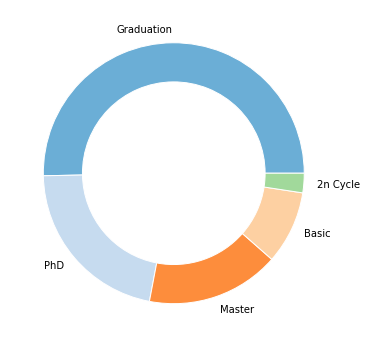

In [13]:
fig, ax = plt.subplots(figsize = (6,6))
label = data["Education"].unique()
size = 0.3
cmap = plt.get_cmap("tab20c")
colors = cmap(np.array([1, 3, 5, 7, 10]))
ax.pie(edu, radius=1, labels = label, colors=colors,
       wedgeprops=dict(width=size, edgecolor='w'))
plt.savefig('meslek.png')

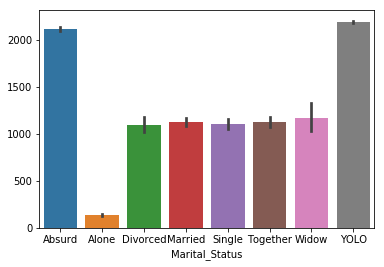

In [14]:
sns.barplot(x = 'Marital_Status', y = data.Marital_Status.index, data = data);
plt.savefig('evlilik.png')

Kategorik değişkenler haricinde sürekli değişkenlerimizide görselleştirip içinde bilgi çıkarabiliriz.

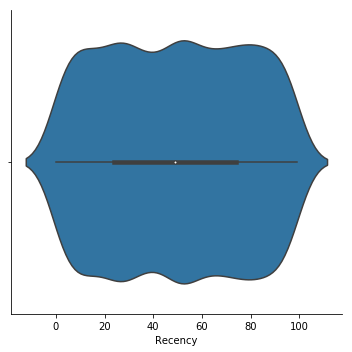

In [15]:
sns.catplot(x = "Recency", kind = "violin", data = data)

Mesela bu grafik bize müşterilerimizin alışveriş yaptığı en son günden bu yana geçen sürenin yoğunluğunu veriyor. Uzun süre önce alışveriş yapmış müşterileri belirleyip onların dikkatini çekmeye odaklanmak bir seçeneğimiz olabilir.

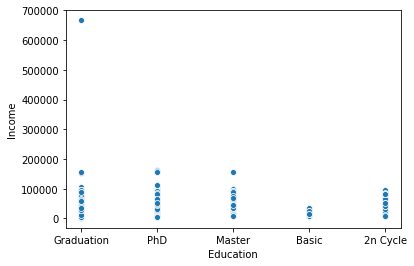

In [16]:
sns.scatterplot(x = "Education", y = "Income", data = data)
plt.savefig('maaş.png')

Bir aykırı değer harici mesleklerin gelir dağılımınıda rahatlıkla görebiliyoruz.

In [17]:
data['AcceptedCmp3'] = data.AcceptedCmp3.astype('category')
data['AcceptedCmp2'] = data.AcceptedCmp2.astype('category')
data['AcceptedCmp1'] = data.AcceptedCmp1.astype('category')
data['AcceptedCmp4'] = data.AcceptedCmp4.astype('category')
data['AcceptedCmp5'] = data.AcceptedCmp5.astype('category')

In [18]:
dummiesdata = pd.get_dummies(data, columns = (["Marital_Status","Education"]), prefix = ["Marital_Status", "Education"])

In [19]:
res = dummiesdata["Response"]

In [20]:
dummiesdata = dummiesdata.drop(["Response"], axis = 1) 

In [21]:
dummiesdata = dummiesdata.drop(["Dt_Customer"], axis = 1)

In [22]:
dummiesdata = dummiesdata.drop(["Year_Birth"], axis = 1)

In [23]:
dummiesdata = dummiesdata.drop(["ID"], axis = 1)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(dummiesdata, res, test_size = 0.33)

In [26]:
from sklearn.ensemble import GradientBoostingRegressor 

In [27]:
gbr = GradientBoostingRegressor()
model = gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.340904995880401

In [33]:
gbr2 = GradientBoostingRegressor(learning_rate=0.5)
model = gbr2.fit(x_train, y_train)
y_pred2 = gbr2.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,y_pred2)))

0.3217768596806345


In [34]:
gbr3 = GradientBoostingRegressor(learning_rate=0.25)
model = gbr3.fit(x_train, y_train)
y_pred3 = gbr3.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,y_pred3)))

0.30561747154727703
